In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import collections


In [2]:
def generate_words_list(file_path):
    words = []

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if len(line) == 5:
                words.append(line)

    return words

In [3]:
def generate_position_dictionary(words):
    positions = {'first': {}, 'second': {}, 'third': {}, 'fourth': {}, 'fifth': {}}

    for i in words:
        for j in range(5):
            position_name = ['first', 'second', 'third', 'fourth', 'fifth'][j]
            if i[j] not in positions[position_name]:
                positions[position_name][i[j]] = 1
            else:
                positions[position_name][i[j]] += 1

    for key in positions:
        positions[key] = dict(sorted(positions[key].items(), key=lambda item: item[1], reverse=True))
        

    for position_name, char_freq in positions.items():
        chars = list(char_freq.keys())
        frequencies = list(char_freq.values())
        plt.figure(figsize=(10, 6))
        plt.bar(chars, frequencies)
        plt.xlabel('Character')
        plt.ylabel('Frequency')
        plt.title(f'Character Frequencies in {position_name.capitalize()} Position')
        plt.show()
    return positions

In [10]:
def filter_words_by_frequencies(words, position_dict):
    sorted_positions = sorted(position_dict.items(), key=lambda item: list(item[1].values())[0], reverse=True)
    
    position_names, char_frequencies = zip(*sorted_positions)
    char_frequencies = [list(freq.values())[0] for freq in char_frequencies]

    plt.figure(figsize=(10, 6))
    plt.bar(position_names, char_frequencies)
    plt.xlabel('Position')
    plt.ylabel('Frequency')
    plt.title('Character Frequencies in Positions')
    plt.show()
    print(sorted_positions)
    
    wordx = words.copy()

    word_lists = {
        'word_first': [],
        'word_second': [],
        'word_third': [],
        'word_fourth': [],
        'word_fifth': [],
    }

    for name, item in sorted_positions:
        z = 1
        flag = False
        wordname = "word_" + name
        while not flag:
            alpha = list(item.keys())[:z]
            for k in alpha:
                for ini in wordx:
                    if str(ini[['first', 'second', 'third', 'fourth', 'fifth'].index(name)]) == str(k):
                        if ini not in word_lists[wordname]:
                            word_lists[wordname].append(ini)

            if len(word_lists["word_" + name]) == 0:
                z += 1
                print("z increase")
            else:
                flag = True
                wordx = word_lists["word_" + name].copy()
    return wordx




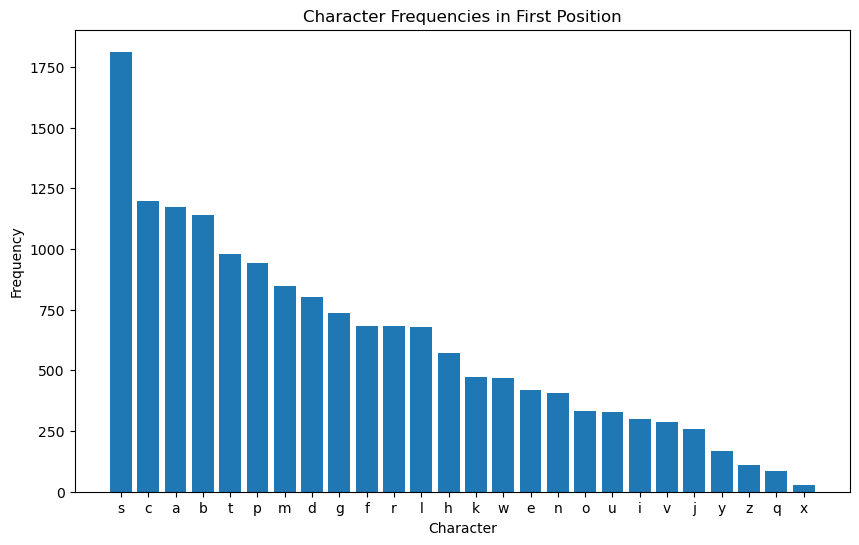

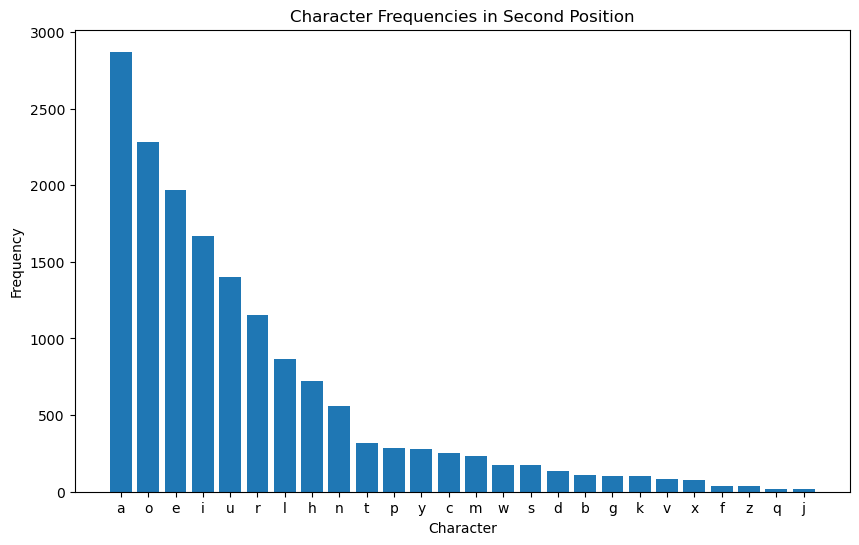

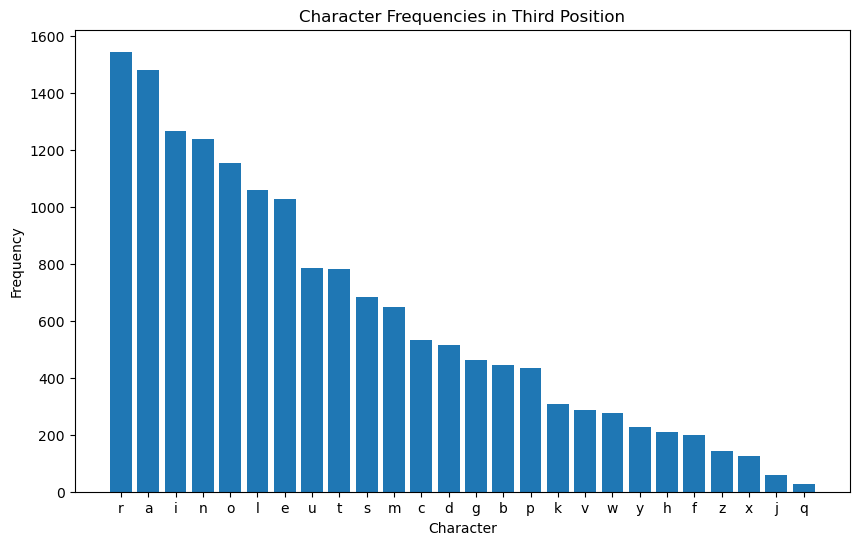

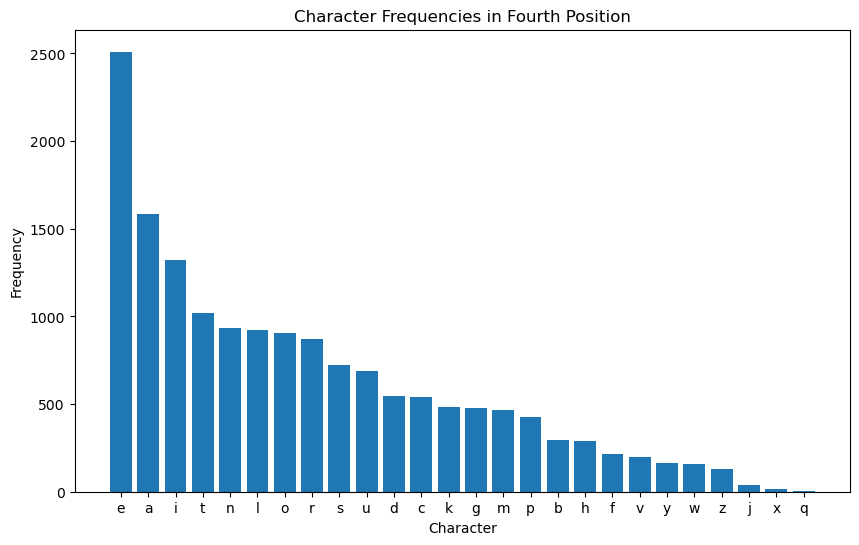

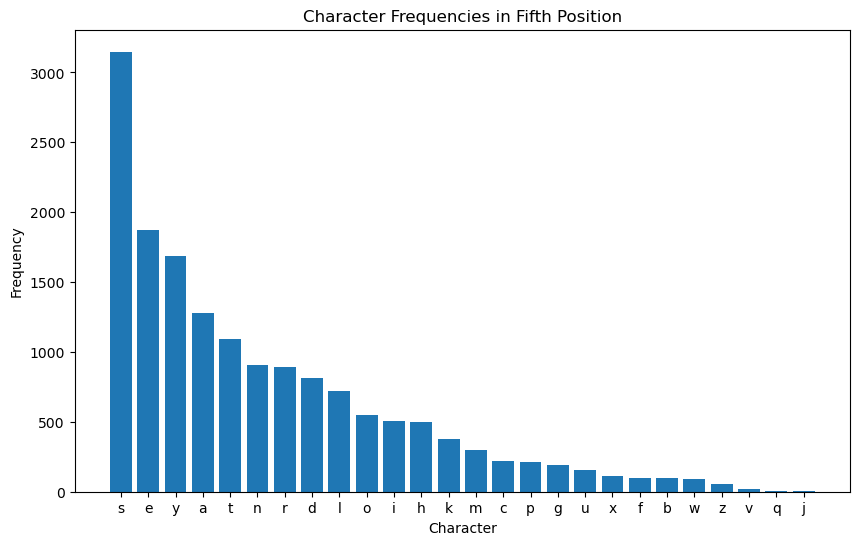

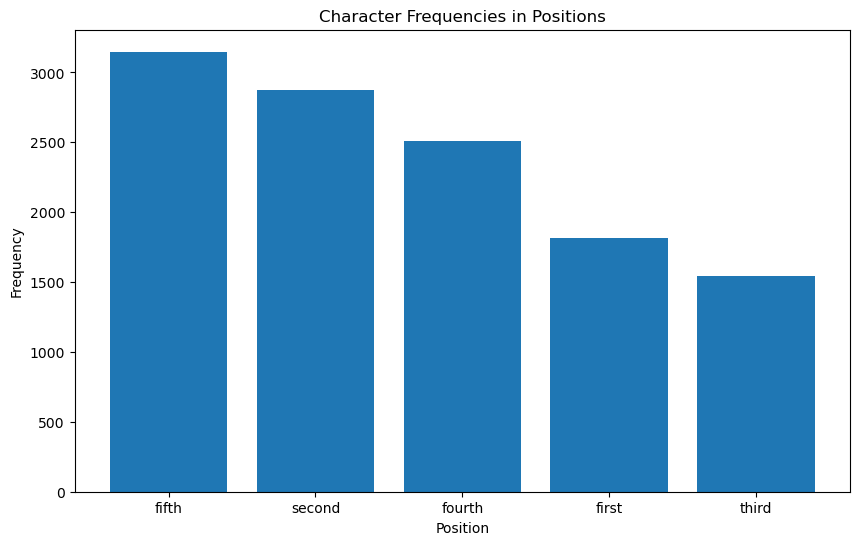

[('fifth', {'s': 3148, 'e': 1873, 'y': 1686, 'a': 1282, 't': 1090, 'n': 909, 'r': 895, 'd': 817, 'l': 718, 'o': 547, 'i': 509, 'h': 497, 'k': 376, 'm': 297, 'c': 221, 'p': 214, 'g': 194, 'u': 157, 'x': 116, 'f': 101, 'b': 97, 'w': 94, 'z': 54, 'v': 23, 'q': 3, 'j': 2}), ('second', {'a': 2871, 'o': 2281, 'e': 1971, 'i': 1669, 'u': 1403, 'r': 1151, 'l': 866, 'h': 720, 'n': 557, 't': 316, 'p': 283, 'y': 279, 'c': 254, 'm': 233, 'w': 174, 's': 173, 'd': 136, 'b': 109, 'g': 102, 'k': 101, 'v': 81, 'x': 74, 'f': 40, 'z': 36, 'q': 21, 'j': 19}), ('fourth', {'e': 2510, 'a': 1585, 'i': 1321, 't': 1019, 'n': 934, 'l': 923, 'o': 903, 'r': 872, 's': 721, 'u': 686, 'd': 545, 'c': 542, 'k': 484, 'g': 477, 'm': 466, 'p': 424, 'b': 297, 'h': 288, 'f': 215, 'v': 200, 'y': 161, 'w': 159, 'z': 129, 'j': 38, 'x': 18, 'q': 3}), ('first', {'s': 1813, 'c': 1196, 'a': 1174, 'b': 1141, 't': 981, 'p': 944, 'm': 849, 'd': 801, 'g': 737, 'f': 684, 'r': 681, 'l': 679, 'h': 571, 'k': 473, 'w': 468, 'e': 421, 'n': 4

In [11]:
words = generate_words_list('words_alpha.txt')


position_dict = generate_position_dictionary(words)

suggested_words = filter_words_by_frequencies(words, position_dict)

print(suggested_words)
print(len(suggested_words))

In [9]:
print(suggested_words)

['sanes']


In [ ]:
crt_word = "stood"
letter_in_crt_pl = {}
letter_in_wrg_pl = {}
letter_not_ext = []

words = generate_words_list('words_alpha.txt')
# Generate the position dictionary
position_dict = generate_position_dictionary(words)

suggested_words = filter_words_by_frequencies(words, position_dict)
my_guess = suggested_words[0]


if my_guess==crt_word:
    print("Cool",crt_word)
    exit()
else:
    while my_guess != crt_word:
        print(my_guess)
        for i in range(5):
            if my_guess[i] not in crt_word and my_guess[i] not in letter_not_ext:
                letter_not_ext.append(str(my_guess[i]))
            elif crt_word[i] == my_guess[i]:
                if crt_word[i] not in letter_in_crt_pl.keys():
                    letter_in_crt_pl[crt_word[i]] = []
                    if i not in letter_in_crt_pl[crt_word[i]]:
                        letter_in_crt_pl[crt_word[i]].append(i)
                else:
                    if i not in letter_in_crt_pl[crt_word[i]]:
                        letter_in_crt_pl[crt_word[i]].append(i)
            else:
                letter_in_wrg_pl[my_guess[i]] = i
        new_words_1 = []
        new_words_2 = []
        new_words_3 = []

        new_words_1 = [word for word in words if not any(letter in word for letter in letter_not_ext)]

        for c in new_words_1:
            conditions_met = True
            for d, positions in letter_in_crt_pl.items():
                for pos in positions:
                    if pos >= len(c) or d != c[pos]:
                        conditions_met = False
                        break
                if not conditions_met:
                    break
            if conditions_met:
                new_words_2.append(c)
        print(new_words_2)

        for e in new_words_2:
            for f in letter_in_wrg_pl.keys():
                if (f  != e[letter_in_wrg_pl[f]]) and e not in new_words_3:
                    new_words_3.append(e)
        #print(new_words_3)

        position_dict1 = generate_position_dictionary(new_words_3)
        suggested_words1 = filter_words_by_frequencies(new_words_3, position_dict1)
        print(new_words_3)
        print(suggested_words1)
        my_guess = suggested_words1[0]
        print(letter_not_ext)
        print(letter_in_wrg_pl)
        print(letter_in_crt_pl)

    print(my_guess)

